In [1]:
import warnings
warnings.filterwarnings("ignore")

import torch
from torch.utils.data import Dataset, DataLoader
import pytorch_lightning as pl
import pickle
import numpy
import argparse
import os
import platform
import shutil
from tqdm import tqdm
import matplotlib.pyplot as plt

from molzip.utils import *
from molzip.autoencoder import *
from molzip.molzip import *
# import mdshare

In [2]:
# pdb = mdshare.fetch('pentapeptide-impl-solv.pdb')
# files = mdshare.fetch('pentapeptide-00-500ns-impl-solv.xtc')

In [3]:
pdb_ = 'pentapeptide-impl-solv.pdb'
traj_ = 'pentapeptide-00-500ns-impl-solv.xtc'

In [4]:
traj = md.load_xtc(traj_, top=pdb_)

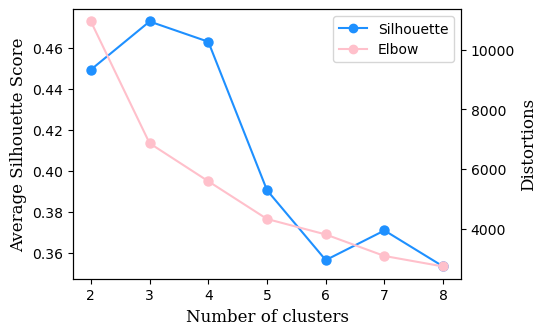

In [5]:
t = TrajectoryAnalysis(traj.xyz)
t.silhouette_plot(max_clusters=8)

In [6]:
clusters = t.clusters(4)

1. Using these clusters, train each cluster seperately
2. When compressing -- load everything in order and use matching trained encoder to decode.
3. Same way, compressed are decompressed by matching decoder

4. Make all this possible when cluster number is given, otherwise None.

In [7]:
train(traj=traj_, top=pdb_, out='/orange/alberto.perezant/t.desilva/', fname='test101', epochs=5, cluster=clusters, w=0.0)

Device name: NVIDIA GeForce RTX 2080 Ti

Trajectory stats : #_Frames = 5001	#_Atoms = 94
______________________________________________________________________ 

Start reading coordinates from trajectory to train model...
[5001 frames with stride 1]


Loading trajectory:   0.00% |                    |


______________________________________________________________________



GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Training Deep Convolutional AutoEncoder model 0


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [6]

  | Name    | Type | Params | Mode 
-----------------------------------------
0 | model   | AE   | 27.3 M | train
1 | loss_fn | Loss | 0      | train
-----------------------------------------
27.3 M    Trainable params
0         Non-trainable params
27.3 M    Total params
109.169   Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode
SLURM auto-requeueing enabled. Setting signal handlers.


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.


Autoencoder training complete
______________________________________________________________________





Training Deep Convolutional AutoEncoder model 1


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [6]

  | Name    | Type | Params | Mode 
-----------------------------------------
0 | model   | AE   | 27.3 M | train
1 | loss_fn | Loss | 0      | train
-----------------------------------------
27.3 M    Trainable params
0         Non-trainable params
27.3 M    Total params
109.169   Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode
SLURM auto-requeueing enabled. Setting signal handlers.


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.


Autoencoder training complete
______________________________________________________________________







GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [6]

  | Name    | Type | Params | Mode 
-----------------------------------------
0 | model   | AE   | 27.3 M | train
1 | loss_fn | Loss | 0      | train
-----------------------------------------
27.3 M    Trainable params
0         Non-trainable params
27.3 M    Total params
109.169   Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode
SLURM auto-requeueing enabled. Setting signal handlers.


Training Deep Convolutional AutoEncoder model 2


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.


Autoencoder training complete
______________________________________________________________________





Training Deep Convolutional AutoEncoder model 3


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [6]

  | Name    | Type | Params | Mode 
-----------------------------------------
0 | model   | AE   | 27.3 M | train
1 | loss_fn | Loss | 0      | train
-----------------------------------------
27.3 M    Trainable params
0         Non-trainable params
27.3 M    Total params
109.169   Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode
SLURM auto-requeueing enabled. Setting signal handlers.


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.


Autoencoder training complete
______________________________________________________________________







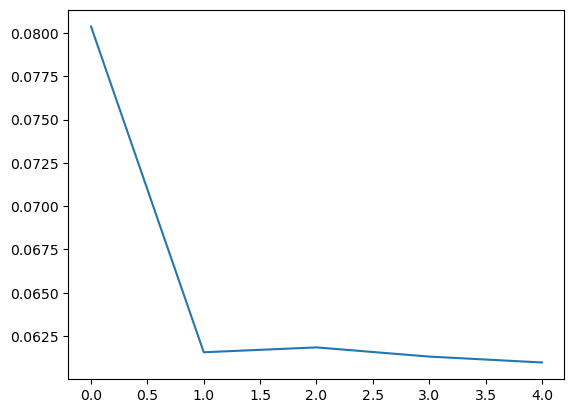

In [8]:
plt.plot(*np.loadtxt('/orange/alberto.perezant/t.desilva/test101_compressed/test101_losses_0.dat').T)

In [9]:
cont_train(traj=traj_, top=pdb_,  model='/orange/alberto.perezant/t.desilva/test101_compressed/test101_model.pt',
           checkpoint='/orange/alberto.perezant/t.desilva/test101_compressed/test101_checkpoints.pt', 
           cluster='/orange/alberto.perezant/t.desilva/test101_compressed/test101_clusters.pkl', epochs=5, w=0.0)

Device name: NVIDIA GeForce RTX 2080 Ti

Trajectory stats : #_Frames = 5001	#_Atoms = 94
______________________________________________________________________ 

Start reading coordinates from trajectory to train model...
[5001 frames with stride 1]


Loading trajectory:   0.00% |                    |
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /orange/alberto.perezant/t.desilva/test101_compressed/test101_checkpoint_0.ckpt


______________________________________________________________________



LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [6]

  | Name    | Type | Params | Mode 
-----------------------------------------
0 | model   | AE   | 27.3 M | train
1 | loss_fn | Loss | 0      | train
-----------------------------------------
27.3 M    Trainable params
0         Non-trainable params
27.3 M    Total params
109.169   Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode
Restored all states from the checkpoint at /orange/alberto.perezant/t.desilva/test101_compressed/test101_checkpoint_0.ckpt
SLURM auto-requeueing enabled. Setting signal handlers.


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


Autoencoder training complete
______________________________________________________________________



GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /orange/alberto.perezant/t.desilva/test101_compressed/test101_checkpoint_1.ckpt




______________________________________________________________________



LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [6]

  | Name    | Type | Params | Mode 
-----------------------------------------
0 | model   | AE   | 27.3 M | train
1 | loss_fn | Loss | 0      | train
-----------------------------------------
27.3 M    Trainable params
0         Non-trainable params
27.3 M    Total params
109.169   Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode
Restored all states from the checkpoint at /orange/alberto.perezant/t.desilva/test101_compressed/test101_checkpoint_1.ckpt
SLURM auto-requeueing enabled. Setting signal handlers.


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


Autoencoder training complete
______________________________________________________________________



GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /orange/alberto.perezant/t.desilva/test101_compressed/test101_checkpoint_2.ckpt




______________________________________________________________________



LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [6]

  | Name    | Type | Params | Mode 
-----------------------------------------
0 | model   | AE   | 27.3 M | train
1 | loss_fn | Loss | 0      | train
-----------------------------------------
27.3 M    Trainable params
0         Non-trainable params
27.3 M    Total params
109.169   Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode
Restored all states from the checkpoint at /orange/alberto.perezant/t.desilva/test101_compressed/test101_checkpoint_2.ckpt
SLURM auto-requeueing enabled. Setting signal handlers.


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


Autoencoder training complete
______________________________________________________________________



GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /orange/alberto.perezant/t.desilva/test101_compressed/test101_checkpoint_3.ckpt




______________________________________________________________________



LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [6]

  | Name    | Type | Params | Mode 
-----------------------------------------
0 | model   | AE   | 27.3 M | train
1 | loss_fn | Loss | 0      | train
-----------------------------------------
27.3 M    Trainable params
0         Non-trainable params
27.3 M    Total params
109.169   Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode
Restored all states from the checkpoint at /orange/alberto.perezant/t.desilva/test101_compressed/test101_checkpoint_3.ckpt
SLURM auto-requeueing enabled. Setting signal handlers.


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


Autoencoder training complete
______________________________________________________________________





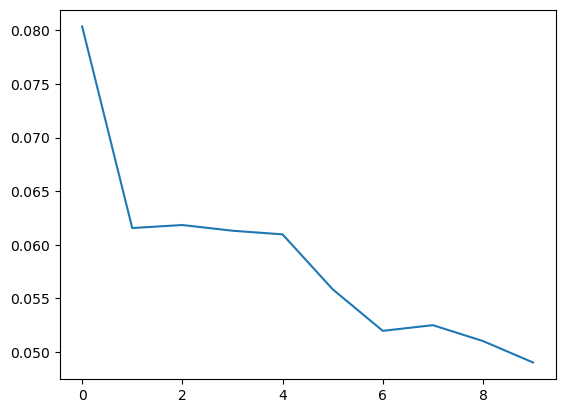

In [10]:
plt.plot(*np.loadtxt('/orange/alberto.perezant/t.desilva/test101_compressed/test101_losses_0.dat').T)

In [11]:
compress(traj=traj_, top=pdb_, model='/orange/alberto.perezant/t.desilva/test101_compressed/test101_model.pt', 
    cluster='/orange/alberto.perezant/t.desilva/test101_compressed/test101_clusters.pkl', 
    out='/orange/alberto.perezant/t.desilva/test101_compressed/', fname='test_101_')

Device name: NVIDIA GeForce RTX 2080 Ti
______________________________________________________________________


Trajectory stats : #_Frames = 5001	#_Atoms = 94
______________________________________________________________________ 

Start reading coordinates from trajectory to train model...
[5001 frames with stride 1]


Loading trajectory:   0.00% |                    |
Compressing : 5001it [00:08, 613.20it/s]


______________________________________________________________________

Original Size [MB]   :          2.221
Compressed Size [MB] :          1.866
Compression %        :         16.006
---


In [12]:
decompress(top=pdb_, model='/orange/alberto.perezant/t.desilva/test101_compressed/test101_model.pt', 
    cluster='/orange/alberto.perezant/t.desilva/test101_compressed/test101_clusters.pkl', 
    out='/orange/alberto.perezant/t.desilva/test101_compressed/decomp.xtc',
    compressed='/orange/alberto.perezant/t.desilva/test101_compressed/test_101__compressed.pkl')

Device name: NVIDIA GeForce RTX 2080 Ti


Compressing : 100%|██████████| 5001/5001 [00:03<00:00, 1285.06it/s]